In [4]:
import os

import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import torch

Tutorial to download AIA images can be found there: https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/downloading_cutouts.html


In [67]:
"""
date: 2011-01-20T09:15:44.000000
basepoint_x: -226.577125	
basepoint_y: -956.964375
"""

start_time = Time('2011-01-20T09:15:44', scale='utc', format='isot') 
bottom_left = SkyCoord(-326*u.arcsec, -1057*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right =SkyCoord(-126*u.arcsec, -857*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

#print(os.environ)
jsoc_email = "adrien.joliat@epfl.ch"

query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(3*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)

print(query)

files = Fido.fetch(query)
files.sort()

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105


Export request pending. [id=JSOC_20231111_992, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-01-20T081538Z.304.image.fits:   0%|          | 0.00/104k [00:00<?, ?B/s]

In [21]:
start_time = Time('2012-09-24T14:56:03', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)
jsoc_email = "adrien.joliat@epfl.ch"
query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)
files = Fido.fetch(query)
files.sort()


Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2012-09-24T08:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T10:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T12:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T14:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T16:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T18:56:01Z  SDO/AIA    AIA_3      171    2128
2012-09-24T20:56:01Z  SDO/AIA    AIA_3      171    2128


Export request pending. [id=JSOC_20231111_922, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_922, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_922, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_922, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_922, status=1]
Waiting for 5 seco

Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

aia.lev1_euv_12s.2012-09-24T085601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T105601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T125601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T145601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T165601Z.171.image.fits:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T185601Z.171.image.fits:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

aia.lev1_euv_12s.2012-09-24T205601Z.171.image.fits:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

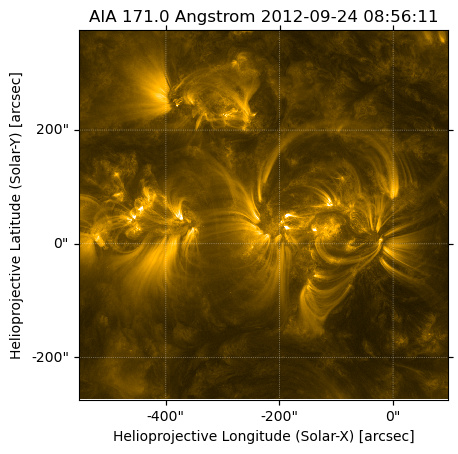

In [38]:
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))


In [40]:
start_time = Time('2016-12-24T14:29:42.0000', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)
jsoc_email = "adrien.joliat@epfl.ch"
query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)
files = Fido.fetch(query)
files.sort()

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2016-12-24T08:29:36Z  SDO/AIA    AIA_3      171    2185
2016-12-24T10:29:36Z  SDO/AIA    AIA_3      171    2185
2016-12-24T12:29:36Z  SDO/AIA    AIA_3      171    2185
2016-12-24T14:29:36Z  SDO/AIA    AIA_3      171    2185
2016-12-24T16:29:36Z  SDO/AIA    AIA_3      171    2185
2016-12-24T18:29:36Z  SDO/AIA    AIA_3      171    2185
2016-12-24T20:29:36Z  SDO/AIA    AIA_3      171    2185


Export request pending. [id=JSOC_20231111_938, status=2]
Waiting for 0 seconds...
7 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

c:\Users\Adrien\anaconda3\envs\envADA\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


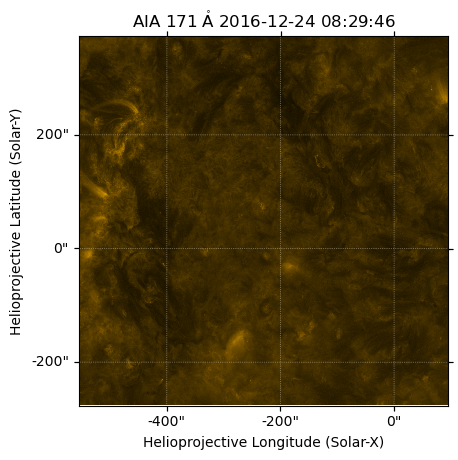

In [42]:
def plot(files):
    sequence = sunpy.map.Map(files, sequence=True)

    fig = plt.figure()
    ax = fig.add_subplot(projection=sequence.maps[0])
    ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

plot(files)

In [56]:
"""
date = 2011-01-20T09:15:44.000000
basepoint_x = -109.0
basepoint_y= -75.0
"""
start_time = Time('2011-01-20T09:15:44.000000', scale='utc', format='isot')
bottom_left = SkyCoord(-1000*u.arcsec, -1000*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(1000*u.arcsec, 1000*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)
jsoc_email = "adrien.joliat@epfl.ch"
query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(171*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)
files = Fido.fetch(query)
files.sort()

Results from 1 Provider:

6 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T03:15:38Z  SDO/AIA    AIA_3      171    2105
2011-01-20T05:15:38Z  SDO/AIA    AIA_3      171    2105
2011-01-20T07:15:38Z  SDO/AIA    AIA_3      171    2105
2011-01-20T09:15:38Z  SDO/AIA    AIA_3      171    2105
2011-01-20T11:15:38Z  SDO/AIA    AIA_3      171    2106
2011-01-20T13:15:38Z  SDO/AIA    AIA_3      171    2106


Export request pending. [id=JSOC_20231111_984, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_984, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_984, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_984, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_984, status=1]
Waiting for 5 seconds...
6 URLs found for download. Full request totalling

Files Downloaded:   0%|          | 0/6 [00:00<?, ?file/s]

In [62]:
print(files[0])

C:\Users\Adrien\sunpy\data\aia.lev1_euv_12s.2011-01-20T031538Z.171.image.fits


SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2011-01-20 03:15:48
Exposure Time:		 2.000196 s
Dimension:		 [1085. 1085.] pix
Coordinate System:	 helioprojective
Scale:			 [0.59948897 0.59948897] arcsec / pix
Reference Pixel:	 [925.179932 460.939941] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[321, 291, 307, ..., 175, 172, 178],
       [313, 321, 328, ..., 182, 178, 175],
       [302, 318, 308, ..., 190, 163, 163],
       ...,
       [209, 217, 205, ..., 147, 164, 176],
       [203, 198, 195, ..., 109, 131, 146],
       [200, 226, 205, ...,  83,  97, 111]], dtype=int16)


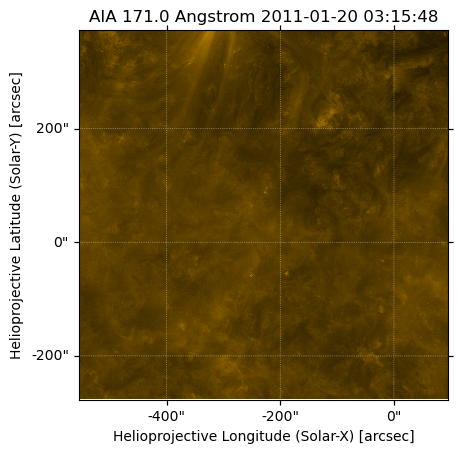

In [60]:
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
print(sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

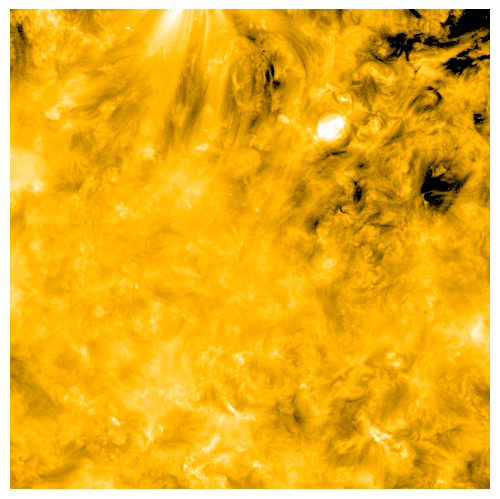

In [65]:
import numpy as np
smap = sunpy.map.Map(files[4])
figure = plt.figure(frameon=False)
ax = plt.axes([0, 0, 1, 1])
# Disable the axis
ax.set_axis_off()

# Plot the map.
# Since we are not interested in the exact map coordinates,
# we can simply use :meth:`~matplotlib.Axes.imshow`.
norm = smap.plot_settings['norm']
norm.vmin, norm.vmax = np.percentile(smap.data, [1, 99.9])
ax.imshow(smap.data,
          norm=norm,
          cmap=smap.plot_settings['cmap'],
          origin="lower")